<center>
<h1> Lab 1 - 7331 Data Mining </h1>
<h2> Dan Freeman, Ireti Fasere, Timothy McWilliams, & Peter Kouvaris </h2>
</center>

### 1 - Business Understanding (10%)

Our dataset was originally extracted from the 1994 United States Census Bureau database by Barry Becker of Silicon Graphics and made available to us on the University of California, Irvine’s Machine Learning Repository website (http://archive.ics.uci.edu/ml/datasets/Adult).  Specifically, the data comes from the Census Bureau’s Current Population Survey (CPS), which is a monthly survey of approximately 60,000 households.  The primary purpose of CPS data is to estimate the unemployment rate and other employment-related measures of the adult civilian noninstitutional population of the United States.  This information helps inform federal, state and local governments how they should go about implementing economic policy, including allocation of government funds, in order to combat poverty and improve the economic outlook of the population as a whole. 


Barry Becker and his colleague Ronny Kohavi analyzed this Census dataset in order to predict whether a household earned at least 50K US dollars (USD) per year or less than 50K USD per year.  Our primary goal will be the same.  If we are able to identify a set of attributes that are highly predictive in determining whether or not a household exceeds the 50K USD income threshold, then this dataset will have served its purpose in providing useful information to allow us to meet our goal.  Moreover, determining a rank ordering of the attributes in terms of their contributions to our model’s classification accuracy will allow us to develop a model that yields accurate results with as few attributes as possible (so as to avoid overfitting).  Therefore, in measuring the effectiveness of our model, we will not only consider its classification accuracy but also measures that penalize overfitting such as adjusted <i>R<sup>2</sup/></i>, AIC, BIC and CV PRESS.


### Preparing Python for Data Exploration

In [162]:
#imports for data-preprocessing
import pandas as pd
import numpy as np

#viz libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [248]:
#import data 
data_file = '../data/adult.csv'
df = pd.read_csv(data_file)

### 2 - Meaning & Data Types (10%)



Below is a table with each of the data set's 14 fields along with their data types and descriptions:

<table>
 <tr style='mso-yfti-irow:0;mso-yfti-firstrow:yes'>
  <td width=126 valign=top style='width:94.8pt;border:solid windowtext 1.0pt;
  mso-border-alt:solid windowtext .5pt;padding:0in 5.4pt 0in 5.4pt'>
  <p class=MsoNormal style='margin-bottom:0in;margin-bottom:.0001pt;line-height:
  normal'><b style='mso-bidi-font-weight:normal'><u><span style='font-size:
  12.0pt;mso-bidi-font-size:11.0pt;font-family:"Times New Roman",serif'>Field<o:p></o:p></span></u></b></p>
  </td>
  <td width=88 valign=top style='width:66.15pt;border:solid windowtext 1.0pt;
  border-left:none;mso-border-left-alt:solid windowtext .5pt;mso-border-alt:
  solid windowtext .5pt;padding:0in 5.4pt 0in 5.4pt'>
  <p class=MsoNormal style='margin-bottom:0in;margin-bottom:.0001pt;line-height:
  normal'><b style='mso-bidi-font-weight:normal'><u><span style='font-size:
  12.0pt;mso-bidi-font-size:11.0pt;font-family:"Times New Roman",serif'>Type<o:p></o:p></span></u></b></p>
  </td>
  <td width=373 valign=top style='width:279.8pt;border:solid windowtext 1.0pt;
  border-left:none;mso-border-left-alt:solid windowtext .5pt;mso-border-alt:
  solid windowtext .5pt;padding:0in 5.4pt 0in 5.4pt'>
  <p class=MsoNormal style='margin-bottom:0in;margin-bottom:.0001pt;line-height:
  normal'><b style='mso-bidi-font-weight:normal'><u><span style='font-size:
  12.0pt;mso-bidi-font-size:11.0pt;font-family:"Times New Roman",serif'>Description<o:p></o:p></span></u></b></p>
  </td>
 </tr>
 <tr>
     <td><b>Field</b> </td>
     <td><b>Type</b> </td>
     <td><b>Description</b> </td>
 </tr>
 <tr style='mso-yfti-irow:1'>
  <td width=126 valign=top style='width:94.8pt;border:solid windowtext 1.0pt;
  border-top:none;mso-border-top-alt:solid windowtext .5pt;mso-border-alt:solid windowtext .5pt;
  padding:0in 5.4pt 0in 5.4pt'>
  <p class=MsoNormal style='margin-bottom:0in;margin-bottom:.0001pt;line-height:
  normal'><span style='font-size:12.0pt;mso-bidi-font-size:11.0pt;font-family:
  "Times New Roman",serif'>age<o:p></o:p></span></p>
  </td>
  <td width=88 valign=top style='width:66.15pt;border-top:none;border-left:
  none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  mso-border-top-alt:solid windowtext .5pt;mso-border-left-alt:solid windowtext .5pt;
  mso-border-alt:solid windowtext .5pt;padding:0in 5.4pt 0in 5.4pt'>
  <p class=MsoNormal style='margin-bottom:0in;margin-bottom:.0001pt;line-height:
  normal'><span style='font-size:12.0pt;mso-bidi-font-size:11.0pt;font-family:
  "Times New Roman",serif'>Integer<o:p></o:p></span></p>
  </td>
  <td width=373 valign=top style='width:279.8pt;border-top:none;border-left:
  none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  mso-border-top-alt:solid windowtext .5pt;mso-border-left-alt:solid windowtext .5pt;
  mso-border-alt:solid windowtext .5pt;padding:0in 5.4pt 0in 5.4pt'>
  <p class=MsoNormal style='margin-bottom:0in;margin-bottom:.0001pt;line-height:
  normal'><span style='font-size:12.0pt;mso-bidi-font-size:11.0pt;font-family:
  "Times New Roman",serif'>Age in years<o:p></o:p></span></p>
  </td>
 </tr>
 <tr style='mso-yfti-irow:2'>
  <td width=126 valign=top style='width:94.8pt;border:solid windowtext 1.0pt;
  border-top:none;mso-border-top-alt:solid windowtext .5pt;mso-border-alt:solid windowtext .5pt;
  padding:0in 5.4pt 0in 5.4pt'>
  <p class=MsoNormal style='margin-bottom:0in;margin-bottom:.0001pt;line-height:
  normal'><span class=SpellE><span style='font-size:12.0pt;mso-bidi-font-size:
  11.0pt;font-family:"Times New Roman",serif'>workclass</span></span><span
  style='font-size:12.0pt;mso-bidi-font-size:11.0pt;font-family:"Times New Roman",serif'><o:p></o:p></span></p>
  </td>
  <td width=88 valign=top style='width:66.15pt;border-top:none;border-left:
  none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  mso-border-top-alt:solid windowtext .5pt;mso-border-left-alt:solid windowtext .5pt;
  mso-border-alt:solid windowtext .5pt;padding:0in 5.4pt 0in 5.4pt'>
  <p class=MsoNormal style='margin-bottom:0in;margin-bottom:.0001pt;line-height:
  normal'><span style='font-size:12.0pt;mso-bidi-font-size:11.0pt;font-family:
  "Times New Roman",serif'>Nominal<o:p></o:p></span></p>
  </td>
  <td width=373 valign=top style='width:279.8pt;border-top:none;border-left:
  none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  mso-border-top-alt:solid windowtext .5pt;mso-border-left-alt:solid windowtext .5pt;
  mso-border-alt:solid windowtext .5pt;padding:0in 5.4pt 0in 5.4pt'>
  <p class=MsoNormal style='margin-bottom:0in;margin-bottom:.0001pt;line-height:
  normal'><span style='font-size:12.0pt;mso-bidi-font-size:11.0pt;font-family:
  "Times New Roman",serif'>Type of employment classified as one of the
  following: <i style='mso-bidi-font-style:normal'>Private</i>, <i
  style='mso-bidi-font-style:normal'>Self-<span class=SpellE>emp</span>-not-<span
  class=SpellE>inc</span></i>, <i style='mso-bidi-font-style:normal'>Self-<span
  class=SpellE>emp</span>-<span class=SpellE>inc</span></i>, <i
  style='mso-bidi-font-style:normal'>Federal-<span class=SpellE>gov</span></i>,
  <i style='mso-bidi-font-style:normal'>Local-<span class=SpellE>gov</span></i>,
  <i style='mso-bidi-font-style:normal'>State-<span class=SpellE>gov</span></i>,
  <i style='mso-bidi-font-style:normal'>Without-pay</i> or <i style='mso-bidi-font-style:
  normal'>Never-worked</i><o:p></o:p></span></p>
  </td>
 </tr>
 <tr style='mso-yfti-irow:3'>
  <td width=126 valign=top style='width:94.8pt;border:solid windowtext 1.0pt;
  border-top:none;mso-border-top-alt:solid windowtext .5pt;mso-border-alt:solid windowtext .5pt;
  padding:0in 5.4pt 0in 5.4pt'>
  <p class=MsoNormal style='margin-bottom:0in;margin-bottom:.0001pt;line-height:
  normal'><span class=SpellE><span style='font-size:12.0pt;mso-bidi-font-size:
  11.0pt;font-family:"Times New Roman",serif'>fnlwght</span></span><span
  style='font-size:12.0pt;mso-bidi-font-size:11.0pt;font-family:"Times New Roman",serif'><o:p></o:p></span></p>
  </td>
  <td width=88 valign=top style='width:66.15pt;border-top:none;border-left:
  none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  mso-border-top-alt:solid windowtext .5pt;mso-border-left-alt:solid windowtext .5pt;
  mso-border-alt:solid windowtext .5pt;padding:0in 5.4pt 0in 5.4pt'>
  <p class=MsoNormal style='margin-bottom:0in;margin-bottom:.0001pt;line-height:
  normal'><span style='font-size:12.0pt;mso-bidi-font-size:11.0pt;font-family:
  "Times New Roman",serif'>Continuous<o:p></o:p></span></p>
  </td>
  <td width=373 valign=top style='width:279.8pt;border-top:none;border-left:
  none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  mso-border-top-alt:solid windowtext .5pt;mso-border-left-alt:solid windowtext .5pt;
  mso-border-alt:solid windowtext .5pt;padding:0in 5.4pt 0in 5.4pt'>
  <p class=MsoNormal style='margin-bottom:0in;margin-bottom:.0001pt;line-height:
  normal'><span style='font-size:12.0pt;mso-bidi-font-size:11.0pt;font-family:
  "Times New Roman",serif'>Population weight; data set was apparently weighted
  up to the world population in 1994 (6.179 billion); this will not be used in
  our analysis<o:p></o:p></span></p>
  </td>
 </tr>
 <tr style='mso-yfti-irow:4'>
  <td width=126 valign=top style='width:94.8pt;border:solid windowtext 1.0pt;
  border-top:none;mso-border-top-alt:solid windowtext .5pt;mso-border-alt:solid windowtext .5pt;
  padding:0in 5.4pt 0in 5.4pt'>
  <p class=MsoNormal style='margin-bottom:0in;margin-bottom:.0001pt;line-height:
  normal'><span style='font-size:12.0pt;mso-bidi-font-size:11.0pt;font-family:
  "Times New Roman",serif'>education<o:p></o:p></span></p>
  </td>
  <td width=88 valign=top style='width:66.15pt;border-top:none;border-left:
  none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  mso-border-top-alt:solid windowtext .5pt;mso-border-left-alt:solid windowtext .5pt;
  mso-border-alt:solid windowtext .5pt;padding:0in 5.4pt 0in 5.4pt'>
  <p class=MsoNormal style='margin-bottom:0in;margin-bottom:.0001pt;line-height:
  normal'><span style='font-size:12.0pt;mso-bidi-font-size:11.0pt;font-family:
  "Times New Roman",serif'>Ordinal<o:p></o:p></span></p>
  </td>
  <td width=373 valign=top style='width:279.8pt;border-top:none;border-left:
  none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  mso-border-top-alt:solid windowtext .5pt;mso-border-left-alt:solid windowtext .5pt;
  mso-border-alt:solid windowtext .5pt;padding:0in 5.4pt 0in 5.4pt'>
  <p class=MsoNormal style='margin-bottom:0in;margin-bottom:.0001pt;line-height:
  normal'><span style='font-size:12.0pt;mso-bidi-font-size:11.0pt;font-family:
  "Times New Roman",serif'>Highest education level completed classified as one of
  the following, in ascending order: <i style='mso-bidi-font-style:normal'>Preschool</i>,
  <i style='mso-bidi-font-style:normal'>1st-4th</i>, <i style='mso-bidi-font-style:
  normal'>5th-6<sup>th</sup></i>,<i style='mso-bidi-font-style:normal'> 7<sup>th</sup>-8<sup>th</sup></i>,<i
  style='mso-bidi-font-style:normal'> 9<sup>th</sup></i>,<i style='mso-bidi-font-style:
  normal'> 10<sup>th</sup></i>, <i style='mso-bidi-font-style:normal'>11<sup>th</sup></i>,<i
  style='mso-bidi-font-style:normal'> 12<sup>th</sup></i>,<i style='mso-bidi-font-style:
  normal'> HS-grad</i>, <i style='mso-bidi-font-style:normal'>Some-college</i>,<i
  style='mso-bidi-font-style:normal'> <span class=SpellE>Assoc-voc</span></i>, <span
  class=SpellE><i style='mso-bidi-font-style:normal'>Assoc-acdm</i></span>,<i
  style='mso-bidi-font-style:normal'> Bachelors</i>,<i style='mso-bidi-font-style:
  normal'> Masters</i>,<i style='mso-bidi-font-style:normal'> Prof-school</i>
  or <i style='mso-bidi-font-style:normal'>Doctorate</i> <o:p></o:p></span></p>
  </td>
 </tr>
 <tr style='mso-yfti-irow:5'>
  <td width=126 valign=top style='width:94.8pt;border:solid windowtext 1.0pt;
  border-top:none;mso-border-top-alt:solid windowtext .5pt;mso-border-alt:solid windowtext .5pt;
  padding:0in 5.4pt 0in 5.4pt'>
  <p class=MsoNormal style='margin-bottom:0in;margin-bottom:.0001pt;line-height:
  normal'><span style='font-size:12.0pt;mso-bidi-font-size:11.0pt;font-family:
  "Times New Roman",serif'>education-<span class=SpellE>num</span><o:p></o:p></span></p>
  </td>
  <td width=88 valign=top style='width:66.15pt;border-top:none;border-left:
  none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  mso-border-top-alt:solid windowtext .5pt;mso-border-left-alt:solid windowtext .5pt;
  mso-border-alt:solid windowtext .5pt;padding:0in 5.4pt 0in 5.4pt'>
  <p class=MsoNormal style='margin-bottom:0in;margin-bottom:.0001pt;line-height:
  normal'><span style='font-size:12.0pt;mso-bidi-font-size:11.0pt;font-family:
  "Times New Roman",serif'>Ordinal<o:p></o:p></span></p>
  </td>
  <td width=373 valign=top style='width:279.8pt;border-top:none;border-left:
  none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  mso-border-top-alt:solid windowtext .5pt;mso-border-left-alt:solid windowtext .5pt;
  mso-border-alt:solid windowtext .5pt;padding:0in 5.4pt 0in 5.4pt'>
  <p class=MsoNormal style='margin-bottom:0in;margin-bottom:.0001pt;line-height:
  normal'><span style='font-size:12.0pt;mso-bidi-font-size:11.0pt;font-family:
  "Times New Roman",serif'>Integer representation of <i style='mso-bidi-font-style:
  normal'>education</i>, with a higher education level corresponding to a
  higher number<b style='mso-bidi-font-weight:normal'><o:p></o:p></b></span></p>
  </td>
 </tr>
 <tr style='mso-yfti-irow:6'>
  <td width=126 valign=top style='width:94.8pt;border:solid windowtext 1.0pt;
  border-top:none;mso-border-top-alt:solid windowtext .5pt;mso-border-alt:solid windowtext .5pt;
  padding:0in 5.4pt 0in 5.4pt'>
  <p class=MsoNormal style='margin-bottom:0in;margin-bottom:.0001pt;line-height:
  normal'><span style='font-size:12.0pt;mso-bidi-font-size:11.0pt;font-family:
  "Times New Roman",serif'>marital-status<o:p></o:p></span></p>
  </td>
  <td width=88 valign=top style='width:66.15pt;border-top:none;border-left:
  none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  mso-border-top-alt:solid windowtext .5pt;mso-border-left-alt:solid windowtext .5pt;
  mso-border-alt:solid windowtext .5pt;padding:0in 5.4pt 0in 5.4pt'>
  <p class=MsoNormal style='margin-bottom:0in;margin-bottom:.0001pt;line-height:
  normal'><span style='font-size:12.0pt;mso-bidi-font-size:11.0pt;font-family:
  "Times New Roman",serif'>Nominal<o:p></o:p></span></p>
  </td>
  <td width=373 valign=top style='width:279.8pt;border-top:none;border-left:
  none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  mso-border-top-alt:solid windowtext .5pt;mso-border-left-alt:solid windowtext .5pt;
  mso-border-alt:solid windowtext .5pt;padding:0in 5.4pt 0in 5.4pt'>
  <p class=MsoNormal style='margin-bottom:0in;margin-bottom:.0001pt;line-height:
  normal'><span style='font-size:12.0pt;mso-bidi-font-size:11.0pt;font-family:
  "Times New Roman",serif'>Marital status classified as one of the following: <i
  style='mso-bidi-font-style:normal'>Married-civ-spouse</i>, <i
  style='mso-bidi-font-style:normal'>Divorced</i>, <i style='mso-bidi-font-style:
  normal'>Never-married</i>, <i style='mso-bidi-font-style:normal'>Separated</i>,
  <i style='mso-bidi-font-style:normal'>Widowed</i>, <i style='mso-bidi-font-style:
  normal'>Married-spouse-absent</i> or <i style='mso-bidi-font-style:normal'>Married-AF-spouse</i><o:p></o:p></span></p>
  </td>
 </tr>
 <tr style='mso-yfti-irow:7'>
  <td width=126 valign=top style='width:94.8pt;border:solid windowtext 1.0pt;
  border-top:none;mso-border-top-alt:solid windowtext .5pt;mso-border-alt:solid windowtext .5pt;
  padding:0in 5.4pt 0in 5.4pt'>
  <p class=MsoNormal style='margin-bottom:0in;margin-bottom:.0001pt;line-height:
  normal'><span style='font-size:12.0pt;mso-bidi-font-size:11.0pt;font-family:
  "Times New Roman",serif'>occupation<o:p></o:p></span></p>
  </td>
  <td width=88 valign=top style='width:66.15pt;border-top:none;border-left:
  none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  mso-border-top-alt:solid windowtext .5pt;mso-border-left-alt:solid windowtext .5pt;
  mso-border-alt:solid windowtext .5pt;padding:0in 5.4pt 0in 5.4pt'>
  <p class=MsoNormal style='margin-bottom:0in;margin-bottom:.0001pt;line-height:
  normal'><span style='font-size:12.0pt;mso-bidi-font-size:11.0pt;font-family:
  "Times New Roman",serif'>Nominal<o:p></o:p></span></p>
  </td>
  <td width=373 valign=top style='width:279.8pt;border-top:none;border-left:
  none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  mso-border-top-alt:solid windowtext .5pt;mso-border-left-alt:solid windowtext .5pt;
  mso-border-alt:solid windowtext .5pt;padding:0in 5.4pt 0in 5.4pt'>
  <p class=MsoNormal style='margin-bottom:0in;margin-bottom:.0001pt;line-height:
  normal'><span style='font-size:12.0pt;mso-bidi-font-size:11.0pt;font-family:
  "Times New Roman",serif'>Occupation classified as one of the following: <i
  style='mso-bidi-font-style:normal'>Tech-support</i>, <i style='mso-bidi-font-style:
  normal'>Craft-repair</i>, <i style='mso-bidi-font-style:normal'>Other-service</i>,
  <i style='mso-bidi-font-style:normal'>Sales</i>, <i style='mso-bidi-font-style:
  normal'>Exec-managerial</i>, <i style='mso-bidi-font-style:normal'>Prof-specialty</i>,
  <i style='mso-bidi-font-style:normal'>Handlers-cleaners</i>, <i
  style='mso-bidi-font-style:normal'>Machine-op-<span class=SpellE>inspct</span></i>,
  <span class=SpellE><i style='mso-bidi-font-style:normal'>Adm</i></span><i
  style='mso-bidi-font-style:normal'>-clerical</i>, <i style='mso-bidi-font-style:
  normal'>Farming-fishing</i>, <i style='mso-bidi-font-style:normal'>Transport-moving</i>,
  <span class=SpellE><i style='mso-bidi-font-style:normal'>Priv</i></span><i
  style='mso-bidi-font-style:normal'>-house-<span class=SpellE>serv</span></i>,
  <i style='mso-bidi-font-style:normal'>Protective-<span class=SpellE>serv</span></i>
  or <i style='mso-bidi-font-style:normal'>Armed-Forces</i><o:p></o:p></span></p>
  </td>
 </tr>
 <tr style='mso-yfti-irow:8'>
  <td width=126 valign=top style='width:94.8pt;border:solid windowtext 1.0pt;
  border-top:none;mso-border-top-alt:solid windowtext .5pt;mso-border-alt:solid windowtext .5pt;
  padding:0in 5.4pt 0in 5.4pt'>
  <p class=MsoNormal style='margin-bottom:0in;margin-bottom:.0001pt;line-height:
  normal'><span style='font-size:12.0pt;mso-bidi-font-size:11.0pt;font-family:
  "Times New Roman",serif'>relationship<o:p></o:p></span></p>
  </td>
  <td width=88 valign=top style='width:66.15pt;border-top:none;border-left:
  none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  mso-border-top-alt:solid windowtext .5pt;mso-border-left-alt:solid windowtext .5pt;
  mso-border-alt:solid windowtext .5pt;padding:0in 5.4pt 0in 5.4pt'>
  <p class=MsoNormal style='margin-bottom:0in;margin-bottom:.0001pt;line-height:
  normal'><span style='font-size:12.0pt;mso-bidi-font-size:11.0pt;font-family:
  "Times New Roman",serif'>Nominal<o:p></o:p></span></p>
  </td>
  <td width=373 valign=top style='width:279.8pt;border-top:none;border-left:
  none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  mso-border-top-alt:solid windowtext .5pt;mso-border-left-alt:solid windowtext .5pt;
  mso-border-alt:solid windowtext .5pt;padding:0in 5.4pt 0in 5.4pt'>
  <p class=MsoNormal style='margin-bottom:0in;margin-bottom:.0001pt;line-height:
  normal'><span style='font-size:12.0pt;mso-bidi-font-size:11.0pt;font-family:
  "Times New Roman",serif'>Relationship to head of household classified as one
  of the following: <i style='mso-bidi-font-style:normal'>Wife</i>, <i
  style='mso-bidi-font-style:normal'>Own-child</i>, <i style='mso-bidi-font-style:
  normal'>Husband</i>, <i style='mso-bidi-font-style:normal'>Not-in-family</i>,
  <i style='mso-bidi-font-style:normal'>Other-relative</i> or <i
  style='mso-bidi-font-style:normal'>Unmarried</i><o:p></o:p></span></p>
  </td>
 </tr>
 <tr style='mso-yfti-irow:9'>
  <td width=126 valign=top style='width:94.8pt;border:solid windowtext 1.0pt;
  border-top:none;mso-border-top-alt:solid windowtext .5pt;mso-border-alt:solid windowtext .5pt;
  padding:0in 5.4pt 0in 5.4pt'>
  <p class=MsoNormal style='margin-bottom:0in;margin-bottom:.0001pt;line-height:
  normal'><span style='font-size:12.0pt;mso-bidi-font-size:11.0pt;font-family:
  "Times New Roman",serif'>race<o:p></o:p></span></p>
  </td>
  <td width=88 valign=top style='width:66.15pt;border-top:none;border-left:
  none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  mso-border-top-alt:solid windowtext .5pt;mso-border-left-alt:solid windowtext .5pt;
  mso-border-alt:solid windowtext .5pt;padding:0in 5.4pt 0in 5.4pt'>
  <p class=MsoNormal style='margin-bottom:0in;margin-bottom:.0001pt;line-height:
  normal'><span style='font-size:12.0pt;mso-bidi-font-size:11.0pt;font-family:
  "Times New Roman",serif'>Nominal<o:p></o:p></span></p>
  </td>
  <td width=373 valign=top style='width:279.8pt;border-top:none;border-left:
  none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  mso-border-top-alt:solid windowtext .5pt;mso-border-left-alt:solid windowtext .5pt;
  mso-border-alt:solid windowtext .5pt;padding:0in 5.4pt 0in 5.4pt'>
  <p class=MsoNormal style='margin-bottom:0in;margin-bottom:.0001pt;line-height:
  normal'><span style='font-size:12.0pt;mso-bidi-font-size:11.0pt;font-family:
  "Times New Roman",serif'>Race classified as one of the following: <i
  style='mso-bidi-font-style:normal'>White</i>, <i style='mso-bidi-font-style:
  normal'>Asian-Pac-Islander</i>, <span class=SpellE><i style='mso-bidi-font-style:
  normal'>Amer</i></span><i style='mso-bidi-font-style:normal'>-Indian-Eskimo</i>,
  <i style='mso-bidi-font-style:normal'>Other</i> or <i style='mso-bidi-font-style:
  normal'>Black</i><o:p></o:p></span></p>
  </td>
 </tr>
 <tr style='mso-yfti-irow:10'>
  <td width=126 valign=top style='width:94.8pt;border:solid windowtext 1.0pt;
  border-top:none;mso-border-top-alt:solid windowtext .5pt;mso-border-alt:solid windowtext .5pt;
  padding:0in 5.4pt 0in 5.4pt'>
  <p class=MsoNormal style='margin-bottom:0in;margin-bottom:.0001pt;line-height:
  normal'><span style='font-size:12.0pt;mso-bidi-font-size:11.0pt;font-family:
  "Times New Roman",serif'>sex<o:p></o:p></span></p>
  </td>
  <td width=88 valign=top style='width:66.15pt;border-top:none;border-left:
  none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  mso-border-top-alt:solid windowtext .5pt;mso-border-left-alt:solid windowtext .5pt;
  mso-border-alt:solid windowtext .5pt;padding:0in 5.4pt 0in 5.4pt'>
  <p class=MsoNormal style='margin-bottom:0in;margin-bottom:.0001pt;line-height:
  normal'><span style='font-size:12.0pt;mso-bidi-font-size:11.0pt;font-family:
  "Times New Roman",serif'>Nominal<o:p></o:p></span></p>
  </td>
  <td width=373 valign=top style='width:279.8pt;border-top:none;border-left:
  none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  mso-border-top-alt:solid windowtext .5pt;mso-border-left-alt:solid windowtext .5pt;
  mso-border-alt:solid windowtext .5pt;padding:0in 5.4pt 0in 5.4pt'>
  <p class=MsoNormal style='margin-bottom:0in;margin-bottom:.0001pt;line-height:
  normal'><span style='font-size:12.0pt;mso-bidi-font-size:11.0pt;font-family:
  "Times New Roman",serif'>Sex classified as either <i style='mso-bidi-font-style:
  normal'>Male</i> or <i style='mso-bidi-font-style:normal'>Female</i><o:p></o:p></span></p>
  </td>
 </tr>
 <tr style='mso-yfti-irow:11'>
  <td width=126 valign=top style='width:94.8pt;border:solid windowtext 1.0pt;
  border-top:none;mso-border-top-alt:solid windowtext .5pt;mso-border-alt:solid windowtext .5pt;
  padding:0in 5.4pt 0in 5.4pt'>
  <p class=MsoNormal style='margin-bottom:0in;margin-bottom:.0001pt;line-height:
  normal'><span style='font-size:12.0pt;mso-bidi-font-size:11.0pt;font-family:
  "Times New Roman",serif'>capital-gain<o:p></o:p></span></p>
  </td>
  <td width=88 valign=top style='width:66.15pt;border-top:none;border-left:
  none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  mso-border-top-alt:solid windowtext .5pt;mso-border-left-alt:solid windowtext .5pt;
  mso-border-alt:solid windowtext .5pt;padding:0in 5.4pt 0in 5.4pt'>
  <p class=MsoNormal style='margin-bottom:0in;margin-bottom:.0001pt;line-height:
  normal'><span style='font-size:12.0pt;mso-bidi-font-size:11.0pt;font-family:
  "Times New Roman",serif'>Continuous</span><span style='font-family:"Times New Roman",serif'><o:p></o:p></span></p>
  </td>
  <td width=373 valign=top style='width:279.8pt;border-top:none;border-left:
  none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  mso-border-top-alt:solid windowtext .5pt;mso-border-left-alt:solid windowtext .5pt;
  mso-border-alt:solid windowtext .5pt;padding:0in 5.4pt 0in 5.4pt'>
  <p class=MsoNormal style='margin-bottom:0in;margin-bottom:.0001pt;line-height:
  normal'><span style='font-size:12.0pt;mso-bidi-font-size:11.0pt;font-family:
  "Times New Roman",serif'> Capital gain earned during 1994, capped at 99,999 <o:p></o:p></span></p>
  </td>
 </tr>
 <tr style='mso-yfti-irow:12'>
  <td width=126 valign=top style='width:94.8pt;border:solid windowtext 1.0pt;
  border-top:none;mso-border-top-alt:solid windowtext .5pt;mso-border-alt:solid windowtext .5pt;
  padding:0in 5.4pt 0in 5.4pt'>
  <p class=MsoNormal style='margin-bottom:0in;margin-bottom:.0001pt;line-height:
  normal'><span style='font-size:12.0pt;mso-bidi-font-size:11.0pt;font-family:
  "Times New Roman",serif'>capital-loss<o:p></o:p></span></p>
  </td>
  <td width=88 valign=top style='width:66.15pt;border-top:none;border-left:
  none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  mso-border-top-alt:solid windowtext .5pt;mso-border-left-alt:solid windowtext .5pt;
  mso-border-alt:solid windowtext .5pt;padding:0in 5.4pt 0in 5.4pt'>
  <p class=MsoNormal style='margin-bottom:0in;margin-bottom:.0001pt;line-height:
  normal'><span style='font-size:12.0pt;mso-bidi-font-size:11.0pt;font-family:
  "Times New Roman",serif'>Continuous</span><span style='font-family:"Times New Roman",serif'><o:p></o:p></span></p>
  </td>
  <td width=373 valign=top style='width:279.8pt;border-top:none;border-left:
  none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  mso-border-top-alt:solid windowtext .5pt;mso-border-left-alt:solid windowtext .5pt;
  mso-border-alt:solid windowtext .5pt;padding:0in 5.4pt 0in 5.4pt'>
  <p class=MsoNormal style='margin-bottom:0in;margin-bottom:.0001pt;line-height:
  normal'><span style='font-size:12.0pt;mso-bidi-font-size:11.0pt;font-family:
  "Times New Roman",serif'>Capital loss suffered during 1994<o:p></o:p></span></p>
  </td>
 </tr>
 <tr style='mso-yfti-irow:13'>
  <td width=126 valign=top style='width:94.8pt;border:solid windowtext 1.0pt;
  border-top:none;mso-border-top-alt:solid windowtext .5pt;mso-border-alt:solid windowtext .5pt;
  padding:0in 5.4pt 0in 5.4pt'>
  <p class=MsoNormal style='margin-bottom:0in;margin-bottom:.0001pt;line-height:
  normal'><span style='font-size:12.0pt;mso-bidi-font-size:11.0pt;font-family:
  "Times New Roman",serif'>hours-per-week<o:p></o:p></span></p>
  </td>
  <td width=88 valign=top style='width:66.15pt;border-top:none;border-left:
  none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  mso-border-top-alt:solid windowtext .5pt;mso-border-left-alt:solid windowtext .5pt;
  mso-border-alt:solid windowtext .5pt;padding:0in 5.4pt 0in 5.4pt'>
  <p class=MsoNormal style='margin-bottom:0in;margin-bottom:.0001pt;line-height:
  normal'><span style='font-size:12.0pt;mso-bidi-font-size:11.0pt;font-family:
  "Times New Roman",serif'>Integer<o:p></o:p></span></p>
  </td>
  <td width=373 valign=top style='width:279.8pt;border-top:none;border-left:
  none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  mso-border-top-alt:solid windowtext .5pt;mso-border-left-alt:solid windowtext .5pt;
  mso-border-alt:solid windowtext .5pt;padding:0in 5.4pt 0in 5.4pt'>
  <p class=MsoNormal style='margin-bottom:0in;margin-bottom:.0001pt;line-height:
  normal'><span style='font-size:12.0pt;mso-bidi-font-size:11.0pt;font-family:
  "Times New Roman",serif'>Number of hours worked per week on average<o:p></o:p></span></p>
  </td>
 </tr>
 <tr style='mso-yfti-irow:14'>
  <td width=126 valign=top style='width:94.8pt;border:solid windowtext 1.0pt;
  border-top:none;mso-border-top-alt:solid windowtext .5pt;mso-border-alt:solid windowtext .5pt;
  padding:0in 5.4pt 0in 5.4pt'>
  <p class=MsoNormal style='margin-bottom:0in;margin-bottom:.0001pt;line-height:
  normal'><span style='font-size:12.0pt;mso-bidi-font-size:11.0pt;font-family:
  "Times New Roman",serif'>native-country<o:p></o:p></span></p>
  </td>
  <td width=88 valign=top style='width:66.15pt;border-top:none;border-left:
  none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  mso-border-top-alt:solid windowtext .5pt;mso-border-left-alt:solid windowtext .5pt;
  mso-border-alt:solid windowtext .5pt;padding:0in 5.4pt 0in 5.4pt'>
  <p class=MsoNormal style='margin-bottom:0in;margin-bottom:.0001pt;line-height:
  normal'><span style='font-size:12.0pt;mso-bidi-font-size:11.0pt;font-family:
  "Times New Roman",serif'>Nominal<o:p></o:p></span></p>
  </td>
  <td width=373 valign=top style='width:279.8pt;border-top:none;border-left:
  none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  mso-border-top-alt:solid windowtext .5pt;mso-border-left-alt:solid windowtext .5pt;
  mso-border-alt:solid windowtext .5pt;padding:0in 5.4pt 0in 5.4pt'>
  <p class=MsoNormal style='margin-bottom:0in;margin-bottom:.0001pt;line-height:
  normal'><span style='font-size:12.0pt;mso-bidi-font-size:11.0pt;font-family:
  "Times New Roman",serif'>Country of origin classified as one of the
  following: <i style='mso-bidi-font-style:normal'>United-States</i>, <i
  style='mso-bidi-font-style:normal'>Cambodia</i>, <i style='mso-bidi-font-style:
  normal'>England</i>, <i style='mso-bidi-font-style:normal'>Puerto-Rico</i>, <i
  style='mso-bidi-font-style:normal'>Canada</i>, <i style='mso-bidi-font-style:
  normal'>Germany</i>, <i style='mso-bidi-font-style:normal'>Outlying-US(Guam-USVI-<span
  class=SpellE>etc</span>)</i>, <i style='mso-bidi-font-style:normal'>India</i>,
  <i style='mso-bidi-font-style:normal'>Japan</i>, <i style='mso-bidi-font-style:
  normal'>Greece</i>, <i style='mso-bidi-font-style:normal'>South</i>, <i
  style='mso-bidi-font-style:normal'>China</i>, <i style='mso-bidi-font-style:
  normal'>Cuba</i>, <i style='mso-bidi-font-style:normal'>Iran</i>, <i
  style='mso-bidi-font-style:normal'>Honduras</i>, <i style='mso-bidi-font-style:
  normal'>Philippines</i>, <i style='mso-bidi-font-style:normal'>Italy</i>, <i
  style='mso-bidi-font-style:normal'>Poland</i>, <i style='mso-bidi-font-style:
  normal'>Jamaica</i>, <i style='mso-bidi-font-style:normal'>Vietnam</i>, <i
  style='mso-bidi-font-style:normal'>Mexico</i>, <i style='mso-bidi-font-style:
  normal'>Portugal</i>, <i style='mso-bidi-font-style:normal'>Ireland</i>, <i
  style='mso-bidi-font-style:normal'>France</i>, <i style='mso-bidi-font-style:
  normal'>Dominican-Republic</i>, <i style='mso-bidi-font-style:normal'>Laos</i>,
  <i style='mso-bidi-font-style:normal'>Ecuador</i>, <i style='mso-bidi-font-style:
  normal'>Taiwan</i>, <i style='mso-bidi-font-style:normal'>Haiti</i>, <i
  style='mso-bidi-font-style:normal'>Columbia</i>, <i style='mso-bidi-font-style:
  normal'>Hungary</i>, <i style='mso-bidi-font-style:normal'>Guatemala</i>, <i
  style='mso-bidi-font-style:normal'>Nicaragua</i>, <i style='mso-bidi-font-style:
  normal'>Scotland</i>, <i style='mso-bidi-font-style:normal'>Thailand</i>, <i
  style='mso-bidi-font-style:normal'>Yugoslavia</i>, <i style='mso-bidi-font-style:
  normal'>El-Salvador</i>, <span class=SpellE><i style='mso-bidi-font-style:
  normal'>Trinadad&amp;Tobago</i></span>, <i style='mso-bidi-font-style:normal'>Peru</i>,
  <i style='mso-bidi-font-style:normal'>Hong</i>, or <span class=SpellE><i
  style='mso-bidi-font-style:normal'>Holand</i></span><i style='mso-bidi-font-style:
  normal'>-Netherlands</i><o:p></o:p></span></p>
  </td>
 </tr>
 <tr style='mso-yfti-irow:15;mso-yfti-lastrow:yes'>
  <td width=126 valign=top style='width:94.8pt;border:solid windowtext 1.0pt;
  border-top:none;mso-border-top-alt:solid windowtext .5pt;mso-border-alt:solid windowtext .5pt;
  padding:0in 5.4pt 0in 5.4pt'>
  <p class=MsoNormal style='margin-bottom:0in;margin-bottom:.0001pt;line-height:
  normal'><span class=SpellE><span style='font-size:12.0pt;mso-bidi-font-size:
  11.0pt;font-family:"Times New Roman",serif'>income_binary</span></span><span
  style='font-size:12.0pt;mso-bidi-font-size:11.0pt;font-family:"Times New Roman",serif'><o:p></o:p></span></p>
  </td>
  <td width=88 valign=top style='width:66.15pt;border-top:none;border-left:
  none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  mso-border-top-alt:solid windowtext .5pt;mso-border-left-alt:solid windowtext .5pt;
  mso-border-alt:solid windowtext .5pt;padding:0in 5.4pt 0in 5.4pt'>
  <p class=MsoNormal style='margin-bottom:0in;margin-bottom:.0001pt;line-height:
  normal'><span style='font-size:12.0pt;mso-bidi-font-size:11.0pt;font-family:
  "Times New Roman",serif'>Ordinal<o:p></o:p></span></p>
  </td>
  <td width=373 valign=top style='width:279.8pt;border-top:none;border-left:
  none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  mso-border-top-alt:solid windowtext .5pt;mso-border-left-alt:solid windowtext .5pt;
  mso-border-alt:solid windowtext .5pt;padding:0in 5.4pt 0in 5.4pt'>
  <p class=MsoNormal style='margin-bottom:0in;margin-bottom:.0001pt;line-height:
  normal'><span style='font-size:12.0pt;mso-bidi-font-size:11.0pt;font-family:
  "Times New Roman",serif'>Annual income classified as either less than or
  equal to $50K or greater than $50K; this will be the dependent variable in
  our models<o:p></o:p></span></p>
  </td>
 </tr>
</table>



### 3 - Data Quality Review (15%)

Our team first reviewed value counts of each variable to determine where and why missing values existed. These are represented by a " ?" in the dataset (note the space before the ? character). Missing values represent unknown values that the Census Bureau was unable to collect. Counts are shown below and summarized in a table after Section 3 code.


In [164]:
#Check to see which variables have missing values, represented by a "?".
#workclass field review
pd.crosstab(index=df["workclass"], columns="count")

col_0,count
workclass,
?,1836
Federal-gov,960
Local-gov,2093
Never-worked,7
Private,22696
Self-emp-inc,1116
Self-emp-not-inc,2541
State-gov,1298
Without-pay,14


In [165]:
#education field review
pd.crosstab(index=df["education"], columns="count") 

col_0,count
education,
10th,933
11th,1175
12th,433
1st-4th,168
5th-6th,333
7th-8th,646
9th,514
Assoc-acdm,1067
Assoc-voc,1382


In [166]:
#education_num field review
pd.crosstab(index=df["education_num"], columns="count") 

col_0,count
education_num,
1,51
2,168
3,333
4,646
5,514
6,933
7,1175
8,433
9,10501


In [167]:
#marital_status field review
pd.crosstab(index=df["marital_status"], columns="count")

col_0,count
marital_status,
Divorced,4443
Married-AF-spouse,23
Married-civ-spouse,14976
Married-spouse-absent,418
Never-married,10683
Separated,1025
Widowed,993


In [168]:
#occupation field review
pd.crosstab(index=df["occupation"], columns="count") 

col_0,count
occupation,
?,1843
Adm-clerical,3770
Armed-Forces,9
Craft-repair,4099
Exec-managerial,4066
Farming-fishing,994
Handlers-cleaners,1370
Machine-op-inspct,2002
Other-service,3295


In [169]:
#relationship field review
pd.crosstab(index=df["relationship"], columns="count")

col_0,count
relationship,
Husband,13193
Not-in-family,8305
Other-relative,981
Own-child,5068
Unmarried,3446
Wife,1568


In [170]:
#race field review
pd.crosstab(index=df["race"], columns="count")

col_0,count
race,
Amer-Indian-Eskimo,311
Asian-Pac-Islander,1039
Black,3124
Other,271
White,27816


In [171]:
pd.crosstab(index=df["sex"], columns="count")

col_0,count
sex,
Female,10771
Male,21790


In [172]:
#10 smallest amounts and most common (0)
pd.crosstab(index=df["capital_gain"], columns="count").head(10)

col_0,count
capital_gain,
0,29849
114,6
401,2
594,34
914,8
991,5
1055,25
1086,4
1111,1


In [173]:
#10 largest amounts
pd.crosstab(index=df["capital_gain"], columns="count").tail(10)

col_0,count
capital_gain,
15831,6
18481,2
20051,37
22040,1
25124,4
25236,11
27828,34
34095,5
41310,2


In [174]:
#smallest 5 loss amounts (most common : 0)
pd.crosstab(index=df["capital_loss"], columns="count").head(5)

col_0,count
capital_loss,
0,31042
155,1
213,4
323,3
419,3


In [175]:
#largest 5 loss amounts
pd.crosstab(index=df["capital_loss"], columns="count").tail(5)

col_0,count
capital_loss,
3004,2
3683,2
3770,2
3900,2
4356,3


count    32561.000000
mean        40.437456
std         12.347429
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         99.000000
Name: hours_per_week, dtype: float64


/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


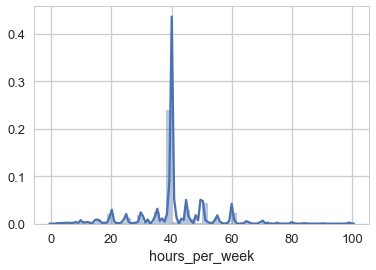

In [176]:
#hours per week describe and dist
sns.distplot(df.hours_per_week)
print(df.hours_per_week.describe())

In [177]:
df.native_country.value_counts(sort=True)

 United-States                 29170
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In [178]:
df.income_binary.value_counts(sort=True)

 <=50K    24720
 >50K      7841
Name: income_binary, dtype: int64

From the tables above, the variables <i>workclass</i>, <i>occupation</i> and <i>native_country</i> have missing values, the numbers of which appears in the table below:

<table>

  <tr>
      <td><b>Field </b></td>
      <td><b>Missing Values </b></td>
   </tr>
   
    <tr>
      <td>workclass</td>
      <td>1,836 </td>
   </tr>
   
       <tr>
      <td>occupation</td>
      <td>1,843 </td>
   </tr>
   
       <tr>
      <td>native_country</td>
      <td>583 </td>
   </tr>
</table>

Now we want to investigate whether there are any commonalities between the <i>workclass</i>, <i>occupation</i> and <i>native_country</i> in terms of missing values.  So we will run crosstabs of each pair of variables among these three, as follows:

In [179]:
pd.crosstab(index=df["workclass"], columns=df["native_country"]) 

native_country,?,Cambodia,Canada,China,Columbia,Cuba,Dominican-Republic,Ecuador,El-Salvador,England,...,Portugal,Puerto-Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia
workclass,,,,,,,,,,,,,,,,,,,,,
?,27,1,14,7,3,3,3,1,6,4,...,3,5,1,9,9,1,1,1659,3,0
Federal-gov,17,1,2,1,2,2,0,0,2,4,...,1,8,0,1,0,0,0,886,2,0
Local-gov,26,0,6,3,0,4,3,1,5,5,...,1,7,0,0,2,0,1,1956,3,1
Never-worked,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,7,0,0
Private,410,16,79,49,46,69,60,25,88,63,...,27,85,9,43,26,10,14,20135,53,13
Self-emp-inc,42,0,6,1,0,9,2,0,1,2,...,2,0,0,7,7,3,1,991,1,1
Self-emp-not-inc,42,1,11,5,7,8,2,1,4,9,...,2,5,1,20,1,3,1,2313,4,1
State-gov,19,0,3,9,1,0,0,0,0,3,...,1,4,1,0,6,1,1,1210,1,0
Without-pay,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,13,0,0


In [180]:
pd.crosstab(index=df["occupation"], columns=df["native_country"])

native_country,?,Cambodia,Canada,China,Columbia,Cuba,Dominican-Republic,Ecuador,El-Salvador,England,...,Portugal,Puerto-Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia
occupation,,,,,,,,,,,,,,,,,,,,,
?,27,1,14,7,3,3,3,1,6,4,...,3,5,1,9,9,1,1,1666,3,0
Adm-clerical,49,0,12,2,8,12,4,1,4,7,...,4,17,1,4,3,2,4,3449,17,1
Armed-Forces,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,9,0,0
Craft-repair,69,6,15,3,9,7,6,4,15,8,...,12,14,0,8,2,1,2,3685,12,2
Exec-managerial,74,1,13,10,4,16,2,1,2,20,...,2,10,3,13,11,4,1,3735,3,5
Farming-fishing,5,1,2,0,0,2,0,0,2,1,...,1,5,0,0,0,0,0,879,2,1
Handlers-cleaners,20,0,2,0,3,3,5,1,7,2,...,5,4,0,2,0,0,0,1189,2,0
Machine-op-inspct,36,4,5,8,10,6,22,8,6,3,...,6,16,2,2,0,1,3,1687,8,2
Other-service,83,1,12,16,8,13,12,3,40,7,...,2,16,2,11,1,4,3,2777,9,4


From the three crosstabs above, we are unable to make any conclusive statements about why the missing values are present in our dataset.  The most obvious similarity is that all 1,836 observations with missing <i>workclass</i> values also have missing <i>occupation</i> values.  However, there are also 7 missing <i>occupation</i> values that have a <i>workclass</i> value of "Never-worked".  We are unable to determine the actual occupations and workplace statuses of the 1,836 individuals with missing values for both <i>workclass</i> and <i>occupation</i>, so we will assume that they are distributed according to  the population proportions of these two variables. In addition, the 583 missing <i>native_country</i> values are spread out over different values of <i>workplace</i> and <i>occupation</i>.

Therefore, we conclude that the observations with missing values for any variables are missing at random.  Hence, we have decided to keep these observations in the data set, as their inclusion will strengthen the statistical validity in the models we build without introducing significant bias.  For any analysis that includes the <i>workclass</i>, <i>occupation</i> and <i>native_country</i> variables specifically, we will classify the missing values into the "Unknown" category.

### 4 - Sample Statistics (10%)

### Basic summary statistics on the continuous variables 

We have some observations that are missing. These are denoted as " ?". We will rename them to be "Unknown". The variable "fnlwgt" represents a weight. We do not know how these weights were derived, so we will exclude it from our analysis. 

In [181]:
#rename the missing values as "Unknown"
df = df.replace(to_replace=' ?',value='Unknown')

#get rid of the "fnlwgt" variable 
if 'fnlwgt' in df:
    del df['fnlwgt']

There are 32,561 individuals that were observed. The ages of the individuals range from 17 to 90 years of age. The overall  mean capital gain is 1,077.64 USD and the overall mean capital loss is 87.30 USD. The mean education level for this data set is 10 which is equal to having some college completed. The average hours worked per week is approximaly 40, equivalant to a full-time job.

In order to get a good understanding of how the categorical data (race, sex, native_country, and education) is distributed, the data will be grouped into each categorical variable and the summary statistics will be displayed. We will create three new variable's 'age_range', 'continents', and 'condensed_education'. These new variables will help better explain the data.

In [182]:
#summary statistics of continuous/nominal data
df.describe()

,age,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,10.080679,1077.648844,87.303830,40.437456
std,13.640433,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,12.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


 The table below displays the counts, unique values, the most frequently occuring category, and the frequency of that category. Every variable has the same count. The top work class is the Private industry, the top education is HS-graduate, the top marital status is married civil spouse's and the top occupation is professional specialty. In addition, most indiviuals make less than 50K USD per year.  

In [183]:
#summary statistics of categorical data 
df.describe(exclude=[np.number])

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,income_binary
count,32561,32561,32561,32561,32561,32561,32561,32561,32561
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27816,21790,29170,24720


The following table displays summary statistics broken down into education completed. The "education" variable was condensed into: No high school completed, High school graduate, Some college, Associate's, Bachelor's, Matser's/Professional school, and Doctorate. Those who had more years of educaiton tend to have a higher mean capital gain and also a higher mean capital loss. Note that the mean hours worked per week for all education levels are the roughly the same. Therefore, someone with more years of education works about the same hours per week as an individual with less years of education but still has a higher mean capital gain and mean capital loss. This can be due to the different types of salary each individual makes.


In [184]:
#summary statistics for all continuous variables grouped by condesned education 
#the "education" variable will be condensed, and then grouped together by which condensed education level they belong to 

#first we need to create a dictionary which holds the education/condensed education pair
EducationDict  = {' Bachelors':'Bachelors', ' HS-grad':'High School Graduate', ' 11th':'No High School Diploma', 
                  ' Masters':'Masters/Professional School', ' 9th':'No High School Diploma',
                  ' Some-college':'Some College', ' Assoc-acdm':'Associates', ' Assoc-voc':'Associates', ' 7th-8th':'No High School Diploma',
                  ' Doctorate':'Doctorate', ' Prof-school':'Masters/Professional School', ' 5th-6th':'No High School Diploma', 
                  ' 10th':'No High School Diploma', ' 1st-4th':'No High School Diploma', ' Preschool':'No High School Diploma',
                  ' 12th':'No High School Diploma'} 

#add the condensed education levels to the df 
df = df.assign(condensed_education=df['education'].map(EducationDict))

#summary statistics grouped by condensed education levels 
#group the data according to condensed education levels
by_condensed_education = df.groupby(['condensed_education'])

#summary statistics on the levels of race
by_condensed_education.describe()

age  capital_gain  capital_loss  \
condensed_education                                                           
Associates                  count   2449.000000   2449.000000   2449.000000   
                            mean      38.042875    682.526337     81.757860   
                            std       11.413330   3726.254956    385.846306   
                            min       19.000000      0.000000      0.000000   
                            25%       29.000000      0.000000      0.000000   
                            50%       37.000000      0.000000      0.000000   
                            75%       45.000000      0.000000      0.000000   
                            max       90.000000  99999.000000   2824.000000   
Bachelors                   count   5355.000000   5355.000000   5355.000000   
                            mean      38.904949   1756.299533    118.350327   
                            std       11.912210   9249.007736    463.645353   
                            min       19.000000      0.000000      0.000000   
                            25%       29.000000      0.000000      0.000000   
                            50%       37.000000      0.000000      0.000000   
                            75%       46.000000      0.000000      0.000000   
                            max       90.000000  99999.000000   2824.000000   
Doctorate                   count    413.000000    413.000000    413.000000   
                            mean      47.702179   4770.145278    262.845036   
                            std       11.784716  17239.523162    698.716559   
                            min       24.000000      0.000000      0.000000   
                            25%       39.000000      0.000000      0.000000   
                            50%       47.000000      0.000000      0.000000   
                            75%       55.000000      0.000000      0.000000   
                            max       80.000000  99999.000000   3683.000000   
High School Graduate        count  10501.000000  10501.000000  10501.000000   
                            mean      38.974479    576.800114     70.466622   
                            std       13.541524   4988.822207    361.019397   
                            min       17.000000      0.000000      0.000000   
                            25%       28.000000      0.000000      0.000000   
                            50%       37.000000      0.000000      0.000000   
                            75%       48.000000      0.000000      0.000000   
                            max       90.000000  99999.000000   4356.000000   
Masters/Professional School count   2299.000000   2299.000000   2299.000000   
                            mean      44.224445   4529.795998    182.875598   
                            std       11.300820  16848.264548    581.440124   
                            min       18.000000      0.000000      0.000000   
                            25%       36.000000      0.000000      0.000000   
                            50%       43.000000      0.000000      0.000000   
                            75%       51.000000      0.000000      0.000000   
                            max       90.000000  99999.000000   2824.000000   
No High School Diploma      count   4253.000000   4253.000000   4253.000000   
                            mean      38.422525    283.507407     51.127910   
                            std       16.877413   2992.363566    312.778377   
                            min       17.000000      0.000000      0.000000   
                            25%       23.000000      0.000000      0.000000   
                            50%       36.000000      0.000000      0.000000   
                            75%       52.000000      0.000000      0.000000   
                            max       90.000000  99999.000000   3900.000000   
Some College                count   7291.000000   7291.000000   7291.000000   
               

The following table displays the summary statistics for workclass. Individuals who work for the federal government, local government or private industry have the highest mean capital gain. Those same working classes also have about the same mean capital loss. 

In [185]:
#summary statistics for all continuous variables grouped by workclass

#group the data according to workclass
by_workclass = df.groupby(['workclass'])

#summary statistics on the levels of workclass
by_workclass.describe()

age  capital_gain  capital_loss  \
workclass                                                           
 Federal-gov      count    960.000000    960.000000    960.000000   
                  mean      42.590625    833.232292    112.268750   
                  std       11.509171   4101.966767    453.504623   
                  min       17.000000      0.000000      0.000000   
                  25%       34.000000      0.000000      0.000000   
                  50%       43.000000      0.000000      0.000000   
                  75%       51.000000      0.000000      0.000000   
                  max       90.000000  99999.000000   3683.000000   
 Local-gov        count   2093.000000   2093.000000   2093.000000   
                  mean      41.751075    880.202580    109.854276   
                  std       12.272856   5775.043442    439.513203   
                  min       17.000000      0.000000      0.000000   
                  25%       32.000000      0.000000      0.000000   
                  50%       41.000000      0.000000      0.000000   
                  75%       50.000000      0.000000      0.000000   
                  max       90.000000  99999.000000   2444.000000   
 Never-worked     count      7.000000      7.000000      7.000000   
                  mean      20.571429      0.000000      0.000000   
                  std        4.613644      0.000000      0.000000   
                  min       17.000000      0.000000      0.000000   
                  25%       18.000000      0.000000      0.000000   
                  50%       18.000000      0.000000      0.000000   
                  75%       21.500000      0.000000      0.000000   
                  max       30.000000      0.000000      0.000000   
 Private          count  22696.000000  22696.000000  22696.000000   
                  mean      36.797585    889.217792     80.008724   
                  std       12.827721   6424.267599    384.157003   
                  min       17.000000      0.000000      0.000000   
                  25%       26.000000      0.000000      0.000000   
                  50%       35.000000      0.000000      0.000000   
...                               ...           ...           ...   
 Self-emp-not-inc std       13.338162  10986.233506    467.611687   
                  min       17.000000      0.000000      0.000000   
                  25%       35.000000      0.000000      0.000000   
                  50%       44.000000      0.000000      0.000000   
                  75%       54.000000      0.000000      0.000000   
                  max       90.000000  99999.000000   2824.000000   
 State-gov        count   1298.000000   1298.000000   1298.000000   
                  mean      39.436055    701.699538     83.256549   
                  std       12.431065   3777.749185    394.469789   
                  min       17.000000      0.000000      0.000000   
                  25%       30.000000      0.000000      0.000000   
                  50%       39.000000      0.000000      0.000000   
                  75%       48.000000      0.000000      0.000000   
                  max       81.000000  99999.000000   3683.000000   
 Without-pay      count     14.000000     14.000000     14.000000   
                  mean      47.785714    487.857143      0.000000   
                  std       21.075610   1300.780467      0.000000   
                  min       19.000000      0.000000      0.000000   
                  25%       23.750000      0.000000      0.000000   
                  50%       57.000000      0.000000      0.000000   
                  75%       65.000000      0.000000      0.000000   
                  max       72.000000   4416.000000      0.000000   
Unknown           count   1836.000000   1836.000000   1836.000000   
                  mean      40.960240    606.795752     60.760349   
                  std       20.334587   5147.323872    354.685264   
                  min       17.0

The following table displays summary statistics broken down into each level of race. Asian/Pacific-Islanders have the highest mean capital gain and mean capital loss. This race also has the highest mean education number. 

In [186]:
#summary statistics for all continuous variables grouped by race

#group the data according to race
by_race = df.groupby(['race'])

#summary statistics on the levels of race
by_race.describe()

age  capital_gain  capital_loss  \
race                                                                  
 Amer-Indian-Eskimo count    311.000000    311.000000    311.000000   
                    mean      37.173633    625.266881     34.176849   
                    std       12.447130   2753.238961    245.583106   
                    min       17.000000      0.000000      0.000000   
                    25%       28.000000      0.000000      0.000000   
                    50%       35.000000      0.000000      0.000000   
                    75%       45.500000      0.000000      0.000000   
                    max       82.000000  27828.000000   1980.000000   
 Asian-Pac-Islander count   1039.000000   1039.000000   1039.000000   
                    mean      37.746872   1478.358037     97.222329   
                    std       12.825133   9986.156906    423.556931   
                    min       17.000000      0.000000      0.000000   
                    25%       28.000000      0.000000      0.000000   
                    50%       36.000000      0.000000      0.000000   
                    75%       45.000000      0.000000      0.000000   
                    max       90.000000  99999.000000   2457.000000   
 Black              count   3124.000000   3124.000000   3124.000000   
                    mean      37.767926    609.940461     60.385083   
                    std       12.759290   5139.653447    337.394121   
                    min       17.000000      0.000000      0.000000   
                    25%       28.000000      0.000000      0.000000   
                    50%       36.000000      0.000000      0.000000   
                    75%       46.000000      0.000000      0.000000   
                    max       90.000000  99999.000000   4356.000000   
 Other              count    271.000000    271.000000    271.000000   
                    mean      33.457565    934.660517     61.070111   
                    std       11.538865   8625.128995    322.452705   
                    min       17.000000      0.000000      0.000000   
                    25%       25.000000      0.000000      0.000000   
                    50%       31.000000      0.000000      0.000000   
                    75%       41.000000      0.000000      0.000000   
                    max       77.000000  99999.000000   2179.000000   
 White              count  27816.000000  27816.000000  27816.000000   
                    mean      38.769881   1121.660375     90.806155   
                    std       13.782306   7504.533302    410.833347   
                    min       17.000000      0.000000      0.000000   
                    25%       28.000000      0.000000      0.000000   
                    50%       37.000000      0.000000      0.000000   
                    75%       48.000000      0.000000      0.000000   
                    max       90.000000  99999.000000   4356.000000   

                           education_num  hours_per_week  
race                                                      
 Amer-Indian-Eskimo count     311.000000      311.000000  
                    mean        9.311897       40.048232  
                    std         2.310387       11.695364  
                    min         2.000000        3.000000  
                    25%         9.000000       40.000000  
                    50%         9.000000       40.000000  
                    75%        10.000000       40.000000  
                    max        16.000000       84.000000  
 Asian-Pac-Islander count    1039.000000     1039.000000  
                    mean       10.960539       40.127045  
                    std         2.811582       12.556816  
                    min         1.000000        1.000000  
                    25%         9.000000       40.000000  
                    50%        10.000000       40.000000  
                    75%        13.000000       40.000000  
                    max        16.000000       99.

 <a id='add_vars_sect'> </a>
 The following table displays the summary statistics for all of the continents present in the data set. Asia and Canada have the highest mean capital gain at 1515.85 USD and 1504.13 USD, respectively. Asia and Canada also have the highest mean capital loss at 116.51 USD and 129.93 USD, respectively. While the US Territories have the lowest mean capital gain of 282.50 USD, Mexico has the lowest mean capital loss of 24.74 USD. 

In [187]:
#summary statistics for all continuous variables grouped by Continents
#the "native_country" variable will be grouped together by which continent's they belong to 

#first we need to create a dictionary which holds the country/continent pair
ContinentDict  = {'China':'Asia', 'Cambodia':'Asia', 'Hong':'Asia', 'India':'Asia', 'Japan':'Asia', 'Laos':'Asia', 'Philippines':'Asia',
                  'South':'Asia', 'Taiwan':'Asia', 'Thailand':'Asia', 'Vietnam':'Asia', 'Iran':'Asia', 'Canada':'Canada', 'United-States':'United States',
                  'Cuba':'Caribbean', 'Dominican-Republic':'Caribbean', 'Haiti':'Caribbean', 'Jamaica':'Caribbean', 'Trinadad&Tobago':'Caribbean',
                  'England':'Europe', 'France':'Europe', 'Germany':'Europe', 'Greece':'Europe', 'Holand-Netherlands':'Europe', 'Hungary':'Europe',
                  'Ireland':'Europe', 'Italy':'Europe', 'Poland':'Europe', 'Portugal':'Europe', 'Scotland':'Europe', 'Yugoslavia':'Europe',
                  'Columbia':'Latin America', 'Ecuador':'Latin America', 'El-Salvador':'Latin America', 'Guatemala':'Latin America',
                  'Honduras':'Latin America', 'Nicaragua':'Latin America', 'Peru':'Latin America', 'Mexico':'Mexico', 'Unknown':'Unknown', 
                  'Outlying-US(Guam-USVI-etc)':'US Territories', 'Puerto-Rico':'US Territories'} 

#clean any white space or spaces within the variable 'native_country'
df['native_country'] = df['native_country'].str.strip()

#add the continents to the df 
df = df.assign(continent=df['native_country'].map(ContinentDict))

#summary statistics grouped by continents 
#group the data according to continents
by_continent = df.groupby(['continent'])

#summary statistics on the levels of continents
by_continent.describe()

age  capital_gain  capital_loss  education_num  \
continent                                                                       
Asia           count    751.000000    751.000000    751.000000     751.000000   
               mean      38.118509   1546.135819    117.101198      11.183755   
               std       12.275203   9938.638495    462.990244       3.029333   
               min       17.000000      0.000000      0.000000       1.000000   
               25%       29.000000      0.000000      0.000000       9.000000   
               50%       36.000000      0.000000      0.000000      12.000000   
               75%       46.000000      0.000000      0.000000      13.000000   
               max       90.000000  99999.000000   2457.000000      16.000000   
Canada         count    121.000000    121.000000    121.000000     121.000000   
               mean      42.545455   1504.132231    129.933884      10.652893   
               std       15.081998   9417.686864    493.593553       2.818719   
               min       17.000000      0.000000      0.000000       3.000000   
               25%       30.000000      0.000000      0.000000       9.000000   
               50%       41.000000      0.000000      0.000000      10.000000   
               75%       53.000000      0.000000      0.000000      13.000000   
               max       80.000000  99999.000000   2339.000000      16.000000   
Caribbean      count    309.000000    309.000000    309.000000     309.000000   
               mean      39.938511    571.834951     51.349515       8.925566   
               std       13.198267   5921.090959    300.661577       3.188498   
               min       17.000000      0.000000      0.000000       1.000000   
               25%       28.000000      0.000000      0.000000       7.000000   
               50%       39.000000      0.000000      0.000000       9.000000   
               75%       50.000000      0.000000      0.000000      10.000000   
               max       82.000000  99999.000000   2339.000000      16.000000   
Europe         count    521.000000    521.000000    521.000000     521.000000   
               mean      41.600768    718.690979     70.032630      10.186180   
               std       13.878938   2849.082410    365.064042       3.103020   
               min       17.000000      0.000000      0.000000       2.000000   
               25%       30.000000      0.000000      0.000000       9.000000   
               50%       40.000000      0.000000      0.000000      10.000000   
...                            ...           ...           ...            ...   
Mexico         std       10.891036   4332.371704    218.523273       3.447250   
               min       17.000000      0.000000      0.000000       1.000000   
               25%       25.000000      0.000000      0.000000       3.000000   
               50%       31.000000      0.000000      0.000000       5.000000   
               75%       40.000000      0.000000      0.000000       9.000000   
               max       81.000000  99999.000000   2603.000000      16.000000   
US Territories count    128.000000    128.000000    128.000000     128.000000   
               mean      40.312500    282.500000     49.187500       8.507812   
               std       13.148306   1297.808710    293.964022       2.990789   
               min       17.000000      0.000000      0.000000       1.000000   
               25%       30.000000      0.000000      0.000000       7.000000   
               50%       40.000000      0.000000      0.000000       9.000000   
               75%       48.250000      0.000000      0.000000      10.000000   
               max       90.000000   7688.000000   2179.000000      13.000000   
United States  count  29170.000000  29170.000000  29170.000000   29170.000000   
               mean      38.655674   1089.229928     88.510593      10.169455   
               std       13.722408   7381.898528    405.681709

 This next section will create the new variable 'age_range'. Doing this will allow us to distingush how may seniors (age > 65 years) are in the work force and how their capital gain and capital loss compares to younger adults (17 years < age < 65 years).

In [188]:
#breaking up the age variable to create a new varible 'age_range'
df['age_range'] = pd.cut(df.age,[16,65,1e6],3,labels=['adult','senior'])

#checking the new variable 
df.age_range.describe()

count     32561
unique        2
top       adult
freq      31403
Name: age_range, dtype: object

 The table displayed below shows the summary statistics for an adult and senior female, as well as an adult and senior male. An adult female has a mean capital gain of 588.95 USD and a mean capital loss of 60.02 USD. A senior female has a mean capital gain of 824.09 USD and a mean capital loss of 92.70 USD. An adult male has a mean capital gain of 1288.70 USD and a mean capital loss of 98.80 USD. A senior male has a mean capital gain of 2433.58 USD and a mean capital loss of 138.38 USD. It is clear that a senior male has the highest mean capital gain and capital loss. 

In [189]:
#group the with the new variable 'age_range' with sex
df_grouped = df.groupby(by=['sex','age_range'])

#summary statistics 
df_grouped.describe()

age  capital_gain  capital_loss  \
sex     age_range                                                   
 Female adult     count  10387.000000  10387.000000  10387.000000   
                  mean      35.570039    558.957928     60.022432   
                  std       12.485963   4977.576200    331.288181   
                  min       17.000000      0.000000      0.000000   
                  25%       25.000000      0.000000      0.000000   
                  50%       34.000000      0.000000      0.000000   
                  75%       45.000000      0.000000      0.000000   
                  max       65.000000  99999.000000   3900.000000   
        senior    count    384.000000    384.000000    384.000000   
                  mean      71.703125    824.098958     92.705729   
                  std        5.691402   3150.936583    539.288758   
                  min       66.000000      0.000000      0.000000   
                  25%       67.000000      0.000000      0.000000   
                  50%       70.000000      0.000000      0.000000   
                  75%       74.000000      0.000000      0.000000   
                  max       90.000000  25124.000000   4356.000000   
 Male   adult     count  21016.000000  21016.000000  21016.000000   
                  mean      38.239912   1288.702893     98.807385   
                  std       12.000155   8240.487488    425.571268   
                  min       17.000000      0.000000      0.000000   
                  25%       29.000000      0.000000      0.000000   
                  50%       37.000000      0.000000      0.000000   
                  75%       47.000000      0.000000      0.000000   
                  max       65.000000  99999.000000   3770.000000   
        senior    count    774.000000    774.000000    774.000000   
                  mean      71.843669   2433.583979    138.387597   
                  std        5.810514  10334.691827    529.996678   
                  min       66.000000      0.000000      0.000000   
                  25%       67.000000      0.000000      0.000000   
                  50%       70.000000      0.000000      0.000000   
                  75%       75.000000      0.000000      0.000000   
                  max       90.000000  99999.000000   2489.000000   

                         education_num  hours_per_week  
sex     age_range                                       
 Female adult     count   10387.000000    10387.000000  
                  mean       10.071628       36.801098  
                  std         2.348443       11.484964  
                  min         1.000000        1.000000  
                  25%         9.000000       32.000000  
                  50%        10.000000       40.000000  
                  75%        12.000000       40.000000  
                  max        16.000000       99.000000  
        senior    count     384.000000      384.000000  
                  mean        9.065104       25.841146  
                  std         2.956328       15.162076  
                  min         1.000000        1.000000  
                  25%         9.000000       15.000000  
                  50%         9.000000       24.000000  
                  75%        10.000000       40.000000  
                  max        16.000000       99.000000  
 Male   adult     count   21016.000000    21016.000000  
                  mean       10.121193       42.863247  
                  std         2.625089       11.680933  
                  min         1.000000        1.000000  
                  25%         9.000000       40.000000  
                  50%        10.000000       40.000000  
                  75%        13.000000       50.000000  
                  max        16.000000       99.000000  
        senior    count     774.000000      774.000000  
                  mean        9.605943       30.612403  
                  std         3.498440       16.913895  
                  min         1.00

### 5 - Visualization (15%)


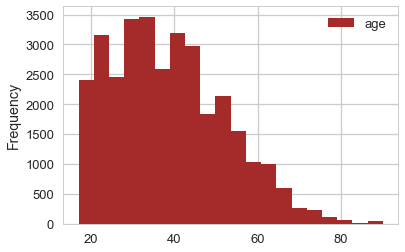

In [190]:
#Histogram
#visualizing the age distribution of the census data
df.age.plot.hist(bins=20, color ='brown')
plt.legend()

The  majority of individuals are distributed between 20 and 55 years old, with a peak between 30 and 40 years old.
Finally, there are older individuals that introduce a right skew. 

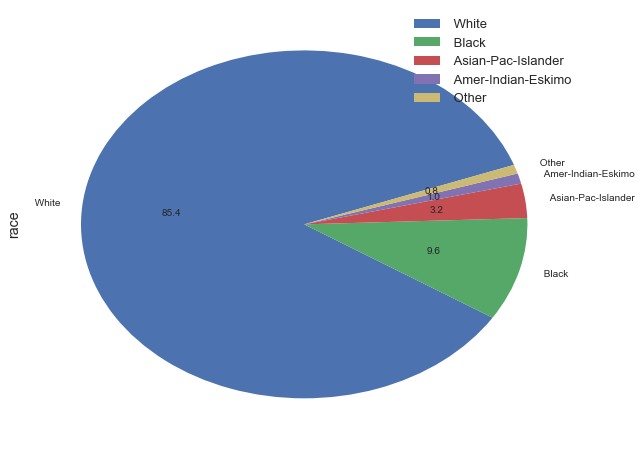

In [191]:
# Pie Chart
#visualizing race of the census data
df.race.value_counts().plot(kind='pie', autopct='%.1f',fontsize=10, startangle = 20, figsize=(10, 8))
plt.legend()

White is by far the most prominent race, accounting for 85.4% of the total sample. Blacks are the second most common race at 9.6%, followed by Asian/Pacific Islanders and American Indians/Eskimos.


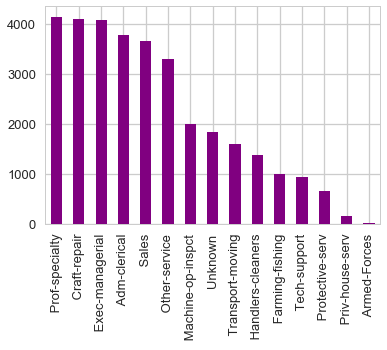

In [192]:
#Barplot
#visualizing education vs income-binary of the census data
df['occupation'].value_counts().plot(kind='bar', color = 'purple')

There are large differences of scale between the most popular and least popular classes within the occupation variable. While the classes with near zero counts may not provide much statistical power, and even confuse classification, we can expect most of these classes to be useful.

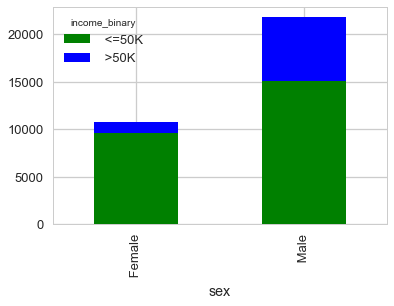

In [193]:
#Barplot
#visualizing sex vs income-binary of the census data
income_sex_counts = pd.crosstab([df['sex']], df.income_binary)
income_sex_counts.plot(kind='bar', stacked=True,color=['green','blue'])

From the barplot, 15,000 males earned below 50K USD, while about 7,000 males earned above 50K USD. Nine-thousand females earned below 50K USD and 2,000 females earned above 50K USD. Males earned more than their female counterparts. Therefore, we can deduce that income distribution is not equal between the sexes.

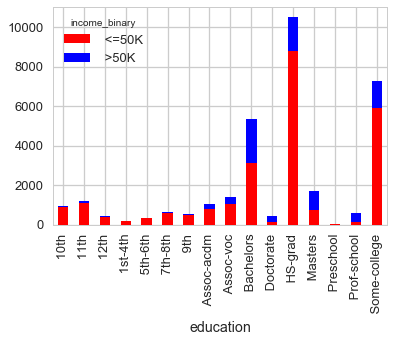

In [194]:
income_education_counts = pd.crosstab([df['education']], df.income_binary)
income_education_counts.plot(kind='bar', stacked=True, color=['red','blue'])

There is a notable increase in the proportion of individuals making greater than 50K USD as the education level increases. Individuals with a professional school degree, Master’s degree or Doctorate are more significantly more likely to earn more than 50K USD than less than 50K USD.


The below pie charts break out race distribution by income. Whites account for 91% of all households that earn more than 50K USD while Whites account for only 84% of households that earn less than 50K USD. 

In [195]:
df.race.value_counts(normalize=True) * 100

 White                 85.427352
 Black                  9.594300
 Asian-Pac-Islander     3.190934
 Amer-Indian-Eskimo     0.955130
 Other                  0.832284
Name: race, dtype: float64

In [196]:
# Pie Chart
#visualizing race of the census data in 2 parts
greater_than_50 = df[df.income_binary == " >50K"]['race'].value_counts()
less_than_50 = df[df.income_binary == " <=50K"]['race'].value_counts()

(-1.1020485163183895,
 1.1067646138120695,
 -1.1076298205737733,
 1.1061964088762901)

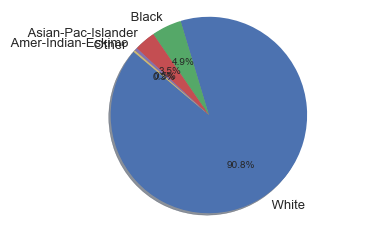

In [197]:
#GREATER THAN 50K
labels = greater_than_50.index
plt.pie(greater_than_50, labels=labels,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')

(-1.104108868764661, 1.106492286853773, -1.1035281294641157, 1.106624389083225)

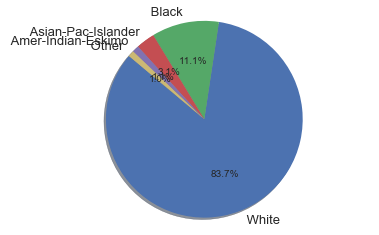

In [198]:
#LESS THAN 50K
labels = less_than_50.index
plt.pie(less_than_50, labels=labels,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')

### 6 - Feature Relationships (15%)

In this section we review the distributions and relationships of variables. We have 3 variables usable as numerical Y-axis variables. These are age, hours_per_week, & capital_gain/capital_loss. Capital_gain/capital_loss rarely deviate from 0, so we rely on *age* and *hours_per_week* as the strongest comparions. Education_num, a numeric ordinal representation of education level also can be used.

In [199]:
#for looking at correlation of variables
from scipy.stats import pearsonr

In [200]:
#head of table for review before exploring relationships
df.head()

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_binary,condensed_education,continent,age_range
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,Bachelors,United States,adult
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,Bachelors,United States,adult
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,High School Graduate,United States,adult
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,No High School Diploma,United States,adult
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,Bachelors,Caribbean,adult


The first feature relationship plot we review is a matrix plot of all numeric data type variables given a hue based on the "income_binary" class variable. We will be attempting to predict this in future labs. Because the points are plotted in layers with the green ">50k" being placed over the blue "<=50k", the areas of interest in the below plots are the fringes where blue peaks out behind the green. We can see this in a few plots and can begin to hypothesize about a few relationships:

1. hours_per_week vs age : "<=50k" showing on the left and right sides (young and old ages). We can assume younger individuals are not making maximum salary yet, and also that older folks who are retired are not still earning maximum salary.
2. education_num vs age : We can see the lower income class is more heavily concentrated near lower education levels.

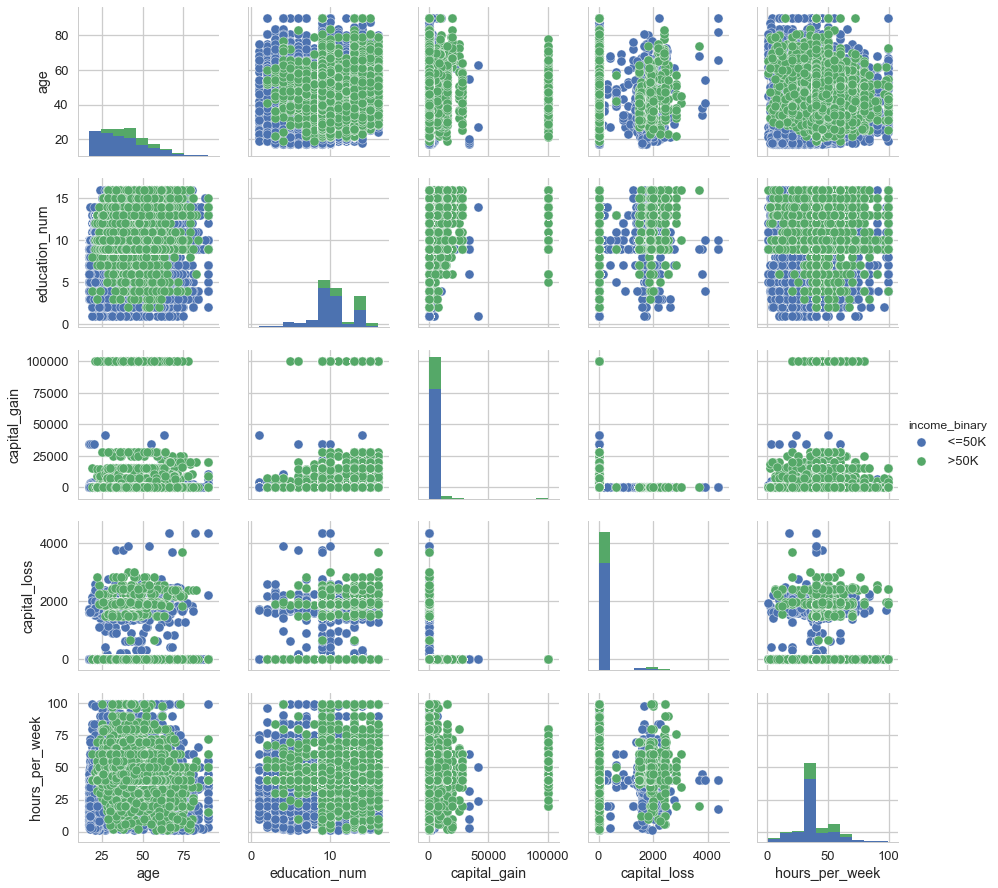

In [201]:
sns.pairplot(df, hue="income_binary")

#### Basic Violins
With the below violins we can visualize the differences in distrubtions of variables. At first we can see a distinction in the density of income_binary based on age. Below that we can see different distributions for education level based on race. This may indicate race having strong statistical power in future models. Less of a difference is noted in the plot below regarding work hours.

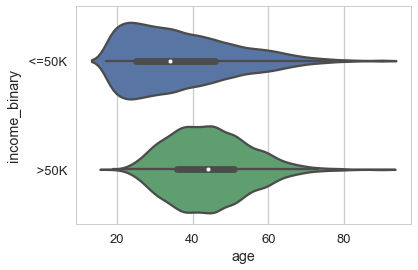

In [202]:
#age vs income
sns.violinplot(x='age',y='income_binary',data=df)

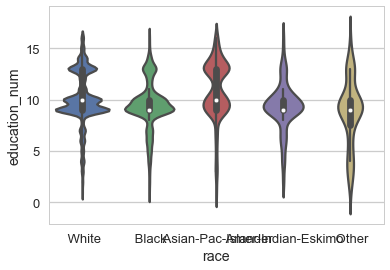

In [219]:
#race vs education_num
sns.violinplot(x='race',y='education_num',data=df)

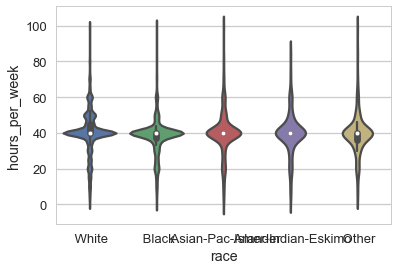

In [204]:
#race vs hours_per_week
sns.violinplot(x='race',y='hours_per_week',data=df)

Correlations between major numerical variables are non-existent. The below plots show the seemingly random relationship between different numerical varaibles.

(0.068755707509557354, 2.011285562158478e-35)


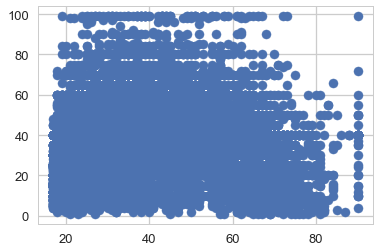

In [215]:
#correlation between age and hours_per_week
print(pearsonr(df.age,df.hours_per_week))
plt.scatter(df.age,df.hours_per_week)

(0.036527189464106116, 4.3057180021041489e-11)


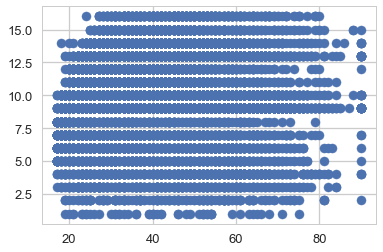

In [214]:
#correlation between age and education
print(pearsonr(df.age,df.education_num))
plt.scatter(df.age,df.education_num)

(0.14812273262291159, 4.2366474791031153e-159)


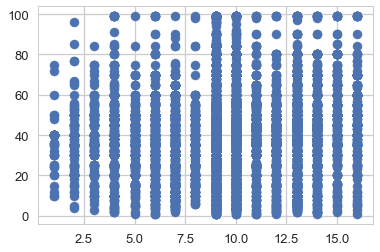

In [213]:
print(pearsonr(df.education_num,df.hours_per_week))
plt.scatter(df.education_num,df.hours_per_week)

### 7 - Feature : Class Relationship Explanation (10%)

The variable we will be predicting is "income_binary", an ordinal variable with two outcomes : "<=50k" & ">50K".  Using split violin plots, we can easily compare the distributions of our two possible outcomes compared to two other variables. 
1. hours_per_week vs race : Tighter distributions around an approximate mean of 40 hours for those making <= 50K USD. 
2. education_num vs race : Bimodal distrubtuions for some races and distributions leaning towards having higher education levels for ">50K".
3. age vs race : Older people are more likely to make the necessary income to reach the ">50k" class. Race distributions do not perfectly match so we assume race may have some value in future models.

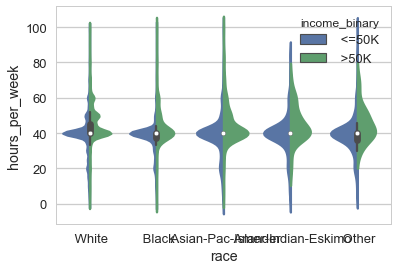

In [207]:
#hours per week worked compared against 2 class vars (race & income_binary)
sns.violinplot(x='race',y='hours_per_week',hue='income_binary',data=df, split=True)

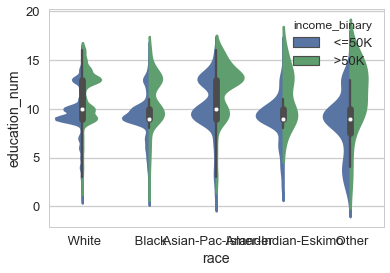

In [208]:
sns.violinplot(x='race',y='education_num',hue='income_binary',data=df,split=True)

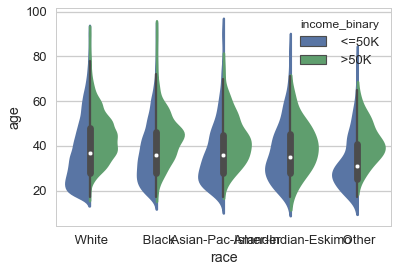

In [209]:
#age compred against 2 class vars (race & income binary)
sns.violinplot(x='race',y='age',hue='income_binary',data=df, split=True)

Here we compare one of our derived variables "cap_binary", a measure of capital activity's existence, to the "income_binary" field and "age". There is no difference between the distributions using the "cap_binary" variable.

False    0.870059
True     0.129941
Name: cap_binary, dtype: float64


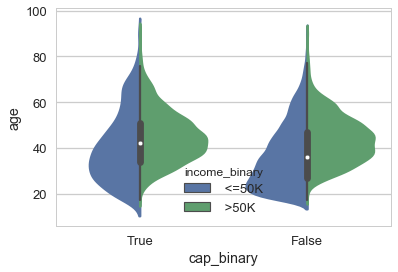

In [218]:

#one of our generated variables (explained in Section 8)
df['cap_activity'] = abs(df.capital_gain) + abs(df.capital_loss)
df['cap_binary'] = np.where(df['cap_activity']!=0, 'True', 'False')
#the % of users with capital activity
print(df.cap_binary.value_counts(normalize=True))
sns.violinplot(x='cap_binary',y='age',hue='income_binary',data=df,split=True)

### 8 - Additional Features Discussion (5%)
We have created a few extra variables that we expect will provide future models with increased accuracy. Items 3-5 were explored in-depth during Section 4, but have been listed below as they are additional features.

1. Absolute value of capital activity.
2. Binary measure of capital activity existing.
3. Condensing education variables.
4. Condensing native country to area of world.
5. Condensing age range.
6. Condensing workclass.
7. Condensing marital status.

In [ ]:
#absolute value of capital activity
df['cap_activity'] = abs(df.capital_gain) + abs(df.capital_loss)

In [221]:
df['cap_binary'] = np.where(df['cap_activity']!=0, 'True', 'False')

In [235]:
#condensing workclass
gov = ['Local-gov','State-gov','Federal-gov']
self = ['Self-emp-not-inc','Self-emp-inc']
unknown_other = ['Unknown','Without-pay','Never-worked']
private = ['Private']

In [233]:
#condensing marital status
married = ['Married-civ-spouse','Married-spouse-absent','Married-AF-spouse']
div_sep = ['Divorced','Separated']
never = ['Never-married']
widowed = ['Widowed']

### 9 - Exceptional Work (10%)

#### Principal Components Analysis (PCA) using Sci-Kit Learn
We performed PCA using two components. This will make it easy to visualize and set us up to expand the number of components in the future if we find a model requiring greater dimensionality reduction. To complete this, we dropped the predictor variable (income_binary) and used pandas .get_dummies() function to binarize all class variables. We then fit SciKit's PCA function and appended these components to our dataframe for easy access in the future. We explored the related outputs below.

In [249]:
from sklearn.decomposition import PCA

In [250]:
#instantiate class w/ 2 components
pca = PCA(n_components=2)

In [252]:
#drop y var and binarize class vars
x = pd.get_dummies(df.drop('income_binary',1))

In [253]:
#generate components and append to dataframe
n = pca.fit(x).transform(x)
components = pd.DataFrame(n)
#just appending the columns using pd.DataFrame causes errors w/ numpy array so we used this method:
df['comp1'] = components[0]
df['comp2'] = components[1]
# df['comp3'] = components[2]
# df['comp4'] = components[3]
# df['comp5'] = components[4]
# df['comp6'] = components[5]

In [254]:
#explained var ratio
pca.fit(x).explained_variance_ratio_

array([ 0.99511364,  0.00487184])

Looks like we really only need the first component with most of the variance being explained by it. This idea is further solidified by the visualization below, which show the difference in scale of Component 1 vs. Component 2. Take note of the distribution plots that exist on the outer sides of the X and Y axes. PC1 is distributed in a reasonable manner relative to itself, while PC2's scale is heavily distorted. This ties to the explained_variance_ratio_ print out shown above, where PC1 is explaining most of the variance.

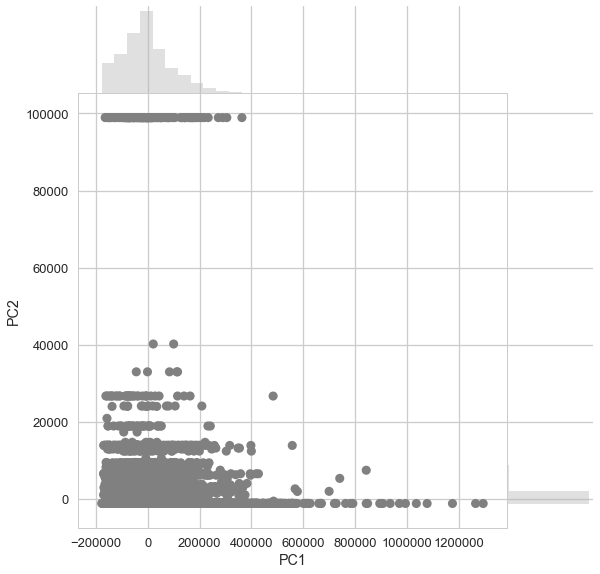

In [255]:
sns.set_style("whitegrid")
sns.set_context('talk')

g = sns.JointGrid(n[:,0],n[:,1], space=0, size=8)
g.plot_marginals(sns.distplot, kde=False, color=".7", bins=30)
g.plot_joint(plt.scatter, color=".5", edgecolor="none", alpha=1)
g.set_axis_labels(xlabel='PC1', ylabel='PC2')